In [2]:
import matplotlib.pyplot as plt
import numpy as np
import pandas as pd
import seaborn as sns
from sklearn.preprocessing import StandardScaler
from sklearn.model_selection import train_test_split
from sklearn.linear_model import LinearRegression
from sklearn.metrics import mean_squared_error, r2_score, mean_absolute_error

In [3]:
# Load the dataset
data = pd.read_csv("C:/Users/Murtaza/Downloads/Ecommerce Customers")


In [4]:
data.head()

,Email,Address,Avatar,Avg. Session Length,Time on App,Time on Website,Length of Membership,Yearly Amount Spent
0,mstephenson@fernandez.com,"835 Frank Tunnel\nWrightmouth, MI 82180-9605",Violet,34.497268,12.655651,39.577668,4.082621,587.951054
1,hduke@hotmail.com,"4547 Archer Common\nDiazchester, CA 06566-8576",DarkGreen,31.926272,11.109461,37.268959,2.664034,392.204933
2,pallen@yahoo.com,"24645 Valerie Unions Suite 582\nCobbborough, D...",Bisque,33.000915,11.330278,37.110597,4.104543,487.547505
3,riverarebecca@gmail.com,"1414 David Throughway\nPort Jason, OH 22070-1220",SaddleBrown,34.305557,13.717514,36.721283,3.120179,581.852344
4,mstephens@davidson-herman.com,"14023 Rodriguez Passage\nPort Jacobville, PR 3...",MediumAquaMarine,33.330673,12.795189,37.536653,4.446308,599.406092


In [5]:
data.tail()

,Email,Address,Avatar,Avg. Session Length,Time on App,Time on Website,Length of Membership,Yearly Amount Spent
495,lewisjessica@craig-evans.com,"4483 Jones Motorway Suite 872\nLake Jamiefurt,...",Tan,33.237660,13.566160,36.417985,3.746573,573.847438
496,katrina56@gmail.com,"172 Owen Divide Suite 497\nWest Richard, CA 19320",PaleVioletRed,34.702529,11.695736,37.190268,3.576526,529.049004
497,dale88@hotmail.com,"0787 Andrews Ranch Apt. 633\nSouth Chadburgh, ...",Cornsilk,32.646777,11.499409,38.332576,4.958264,551.620145
498,cwilson@hotmail.com,"680 Jennifer Lodge Apt. 808\nBrendachester, TX...",Teal,33.322501,12.391423,36.840086,2.336485,456.469510
499,hannahwilson@davidson.com,49791 Rachel Heights Apt. 898\nEast Drewboroug...,DarkMagenta,33.715981,12.418808,35.771016,2.735160,497.778642


In [74]:
data.sample()

,Avg. Session Length,Time on App,Time on Website,Length of Membership,Yearly Amount Spent
166,33.630801,12.039648,38.924087,2.873008,497.81193


In [76]:
data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 500 entries, 0 to 499
Data columns (total 5 columns):
 #   Column                Non-Null Count  Dtype  
---  ------                --------------  -----  
 0   Avg. Session Length   500 non-null    float64
 1   Time on App           500 non-null    float64
 2   Time on Website       500 non-null    float64
 3   Length of Membership  500 non-null    float64
 4   Yearly Amount Spent   500 non-null    float64
dtypes: float64(5)
memory usage: 19.7 KB


In [7]:
data.describe()

,Avg. Session Length,Time on App,Time on Website,Length of Membership,Yearly Amount Spent
count,500.000000,500.000000,500.000000,500.000000,500.000000
mean,33.053194,12.052488,37.060445,3.533462,499.314038
std,0.992563,0.994216,1.010489,0.999278,79.314782
min,29.532429,8.508152,33.913847,0.269901,256.670582
25%,32.341822,11.388153,36.349257,2.930450,445.038277
50%,33.082008,11.983231,37.069367,3.533975,498.887875
75%,33.711985,12.753850,37.716432,4.126502,549.313828
max,36.139662,15.126994,40.005182,6.922689,765.518462


In [8]:
data.isnull().sum()


Email                   0
Address                 0
Avatar                  0
Avg. Session Length     0
Time on App             0
Time on Website         0
Length of Membership    0
Yearly Amount Spent     0
dtype: int64

In [77]:
data.isnull().sum().sum()

0

In [80]:
# Drop non-numeric columns if they exist
cols_to_drop = ['Email', 'Address', 'Avatar']
existing_cols = [col for col in cols_to_drop if col in data.columns]
data.drop(existing_cols, axis=1, inplace=True)


# Handle missing values if any
data.fillna(data.mean(), inplace=True)

# Check for duplicates
data.drop_duplicates(inplace=True)
data.dropna(inplace=True)
missing_values = data.isnull().sum()
print(missing_values)

Avg. Session Length     0
Time on App             0
Time on Website         0
Length of Membership    0
Yearly Amount Spent     0
dtype: int64


In [ ]:
# Outlier removal using IQR
numeric_cols = data.select_dtypes(include=[np.number])
Q1 = numeric_cols.quantile(0.25)
Q3 = numeric_cols.quantile(0.75)
IQR = Q3 - Q1
data_cleaned = data[~((numeric_cols < (Q1 - 1.5 * IQR)) | (numeric_cols > (Q3 + 1.5 * IQR))).any(axis=1)]

plt.figure(figsize=(30, 5))
plt.subplot(1, 2, 1)
numeric_cols.boxplot()
plt.title("Before Outlier Removal")
plt.tight_layout()
plt.show()

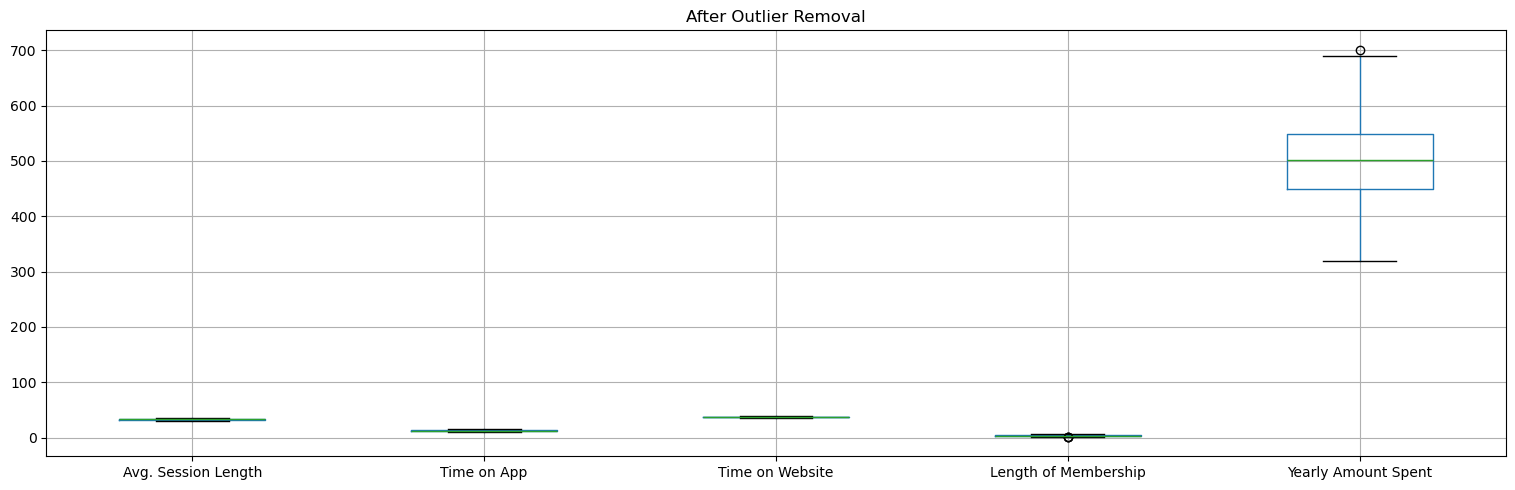

In [71]:
plt.figure(figsize=(30, 5))
plt.subplot(1, 2, 2)
data_cleaned.select_dtypes(include=[np.number]).boxplot()
plt.title("After Outlier Removal")
plt.tight_layout()
plt.show()

In [73]:
data_cleaned.shape

(476, 5)

In [15]:
data_cleaned.head()

,Avg. Session Length,Time on App,Time on Website,Length of Membership,Yearly Amount Spent
0,34.497268,12.655651,39.577668,4.082621,587.951054
1,31.926272,11.109461,37.268959,2.664034,392.204933
2,33.000915,11.330278,37.110597,4.104543,487.547505
3,34.305557,13.717514,36.721283,3.120179,581.852344
4,33.330673,12.795189,37.536653,4.446308,599.406092


In [65]:
from sklearn.preprocessing import MinMaxScaler
import pandas as pd

# Assuming 'data' is your cleaned dataframe with only numeric columns
numeric_cols = data.select_dtypes(include=['number'])

scaler = MinMaxScaler()
scaled_numeric_data = scaler.fit_transform(numeric_cols)
scaled_numeric_df = pd.DataFrame(scaled_numeric_data, columns=numeric_cols.columns)

# No need to concatenate with non-numeric columns
scaled_data = scaled_numeric_df

print(scaled_data.shape)
print()
print('*' * 60)
scaled_data.head()



(500, 5)

************************************************************


,Avg. Session Length,Time on App,Time on Website,Length of Membership,Yearly Amount Spent
0,0.751425,0.626620,0.929816,0.573101,0.651040
1,0.362306,0.393016,0.550801,0.359869,0.266355
2,0.524953,0.426378,0.524803,0.576396,0.453725
3,0.722409,0.787050,0.460890,0.428434,0.639055
4,0.574861,0.647702,0.594748,0.627768,0.673552


In [70]:

from sklearn.preprocessing import StandardScaler

# Automatically drop non-numeric columns
numeric_data = data.select_dtypes(include=[np.number])

# Apply StandardScaler
scaler = StandardScaler()
scaled_numeric_data = scaler.fit_transform(numeric_data)

# Convert back to DataFrame with original column names
scaled_data = pd.DataFrame(scaled_numeric_data, columns=numeric_data.columns)

# Output
print(scaled_data.shape)
print('*' * 60)
scaled_data.head()


(500, 5)
************************************************************


,Avg. Session Length,Time on App,Time on Website,Length of Membership,Yearly Amount Spent
0,1.456351,0.607280,2.493589,0.550107,1.118654
1,-1.136502,-0.949464,0.206556,-0.870927,-1.351783
2,-0.052723,-0.727139,0.049681,0.572067,-0.148501
3,1.263010,1.676390,-0.335978,-0.413996,1.041684
4,0.279838,0.747770,0.471737,0.914422,1.263224


X shape: (476, 4), y shape: (476,)


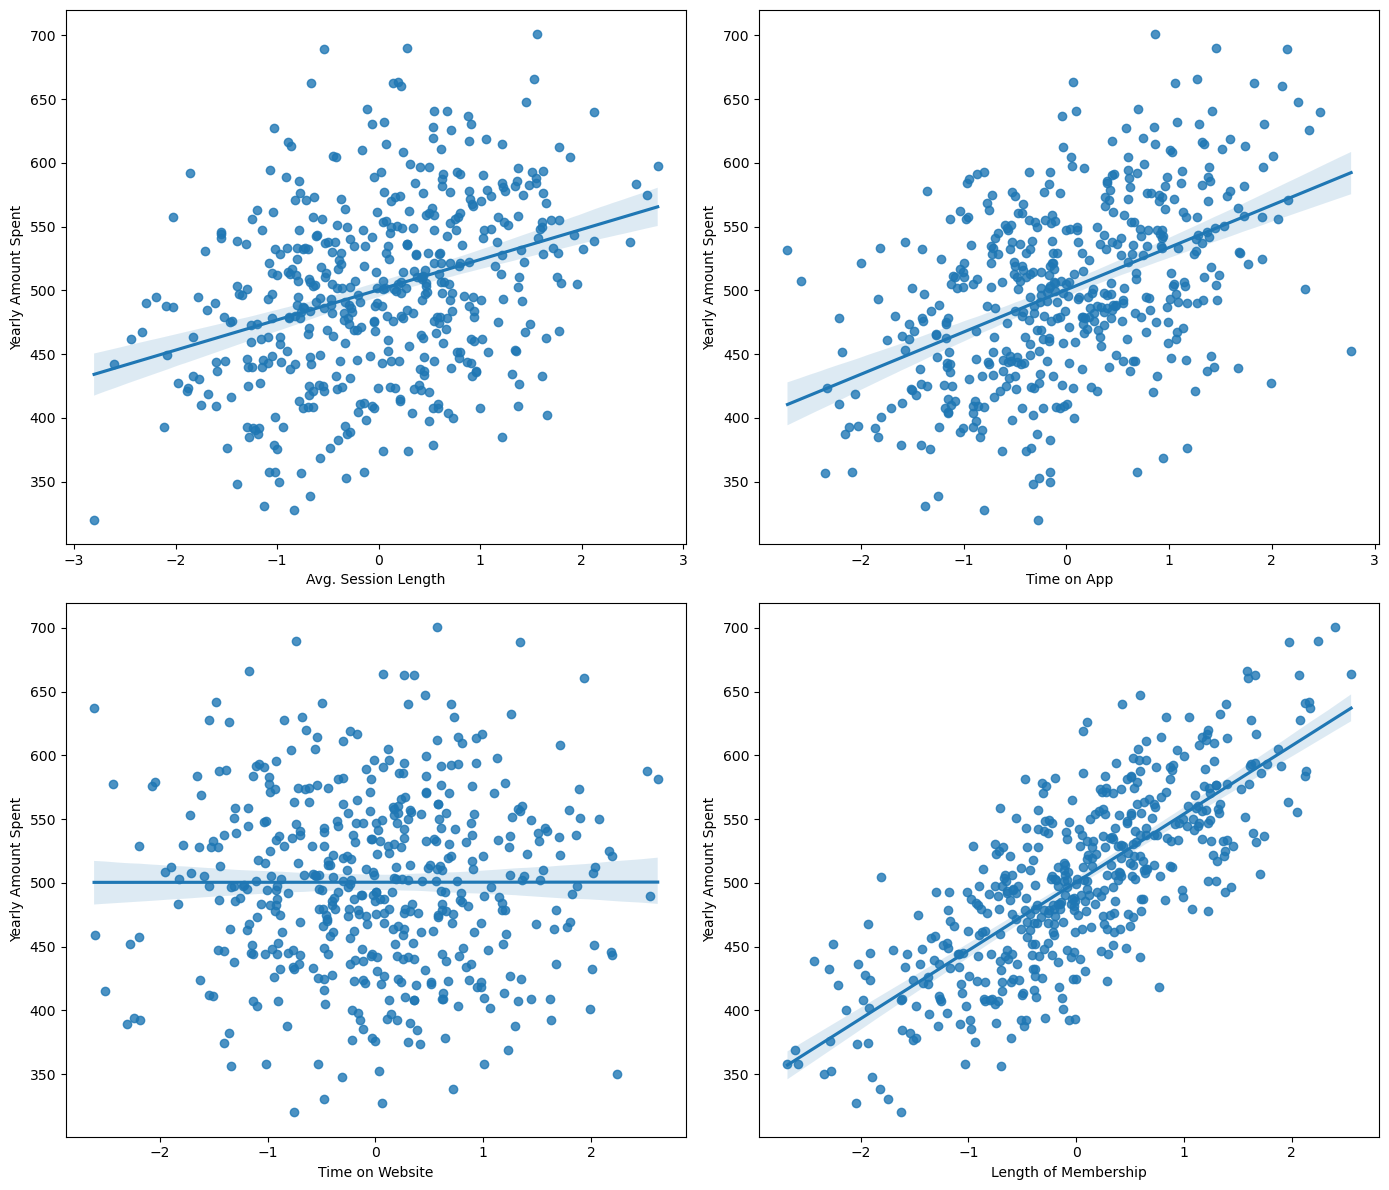

In [59]:
# Redefine X and y together from the same dataframe
X = data_cleaned.drop(columns=['Yearly Amount Spent'])
y = data_cleaned['Yearly Amount Spent']

# Scale X
scaler = StandardScaler()
X_scaled = scaler.fit_transform(X)
X = pd.DataFrame(X_scaled, columns=X.columns)

# Concatenate X and y after confirming their shapes match
print(f"X shape: {X.shape}, y shape: {y.shape}")

# Combine for plotting
combined = pd.concat([X.reset_index(drop=True), y.reset_index(drop=True)], axis=1)

# Plotting regression plots
variables = X.columns
fig, ax = plt.subplots(2, 2, figsize=(14, 12))

for index, var in enumerate(variables):
    row = index // 2
    col = index % 2
    sns.regplot(x=var, y='Yearly Amount Spent', data=combined, ax=ax[row][col])

plt.tight_layout()
plt.show()

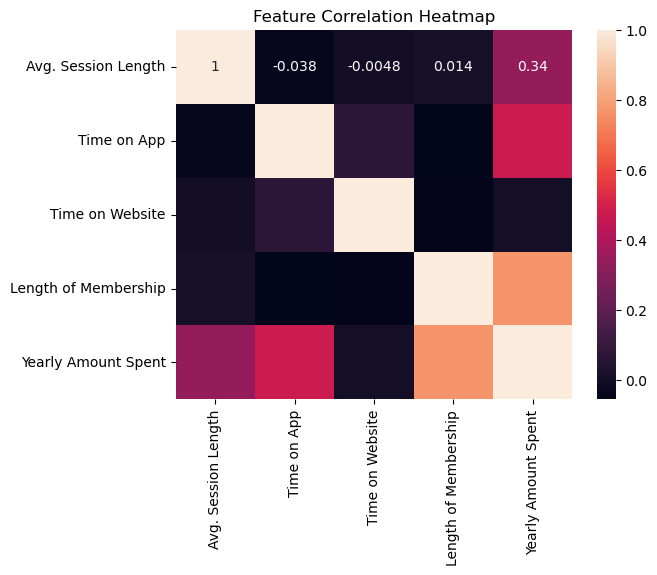

In [23]:
# Correlation heatmap
correlations = data_cleaned.corr()
sns.heatmap(correlations, annot=True).set(title='Feature Correlation Heatmap')
plt.show()

In [ ]:
# Train-test split
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)
print(f"X_train shape:{X_train.shape}")
print(f"X_test shape: {X_test.shape}")
print(f"y_train shape:{y_train.shape}")
print(f"y_test shape: {y_test.shape}")


In [37]:

# Model training
model = LinearRegression()
model.fit(X_train, y_train)

LinearRegression()

In [55]:
model.intercept_

500.6688700885684

In [56]:
model.coef_

array([24.58009498, 37.183403  ,  0.06125585, 55.06434505])

In [57]:
feature_names = X.columns

In [58]:
# Model coefficients
print("Intercept:", model.intercept_)
coefficients_df = pd.DataFrame({
    'Feature': X.columns,
    'Coefficient': model.coef_
})
print(coefficients_df)

Intercept: 500.6688700885684
                Feature  Coefficient
0   Avg. Session Length    24.580095
1           Time on App    37.183403
2       Time on Website     0.061256
3  Length of Membership    55.064345


In [39]:

# Predictions
y_pred = model.predict(X_test)


In [53]:
# Compare actual vs predicted
results = pd.DataFrame({'Actual': y_test, 'Predicted': y_pred})
print(results.head())

         Actual   Predicted
491  510.501478  513.839885
34   507.441832  513.334415
135  482.353570  483.187984
76   444.285907  450.452298
82   596.430173  619.701350


In [42]:
# Evaluation metrics
mae = mean_absolute_error(y_test, y_pred)
mse = mean_squared_error(y_test, y_pred)
rmse = np.sqrt(mse)
r2 = r2_score(y_test, y_pred)

print()
print("Model Performance:")
print(f"Mean Absolute Error (MAE): {mae:.2f}")
print(f"Mean Squared Error (MSE): {mse:.2f}")
print(f"Root Mean Squared Error (RMSE): {rmse:.2f}")


Model Performance:
Mean Absolute Error (MAE): 8.06
Mean Squared Error (MSE): 104.80
Root Mean Squared Error (RMSE): 10.24


In [54]:
print(f"R² Score: {r2:.4f}")

R² Score: 0.9789


In [81]:
model.score(X_train, y_train)

0.9795259398509938

In [51]:
model.score(X_test, y_test)

0.9789326764511697